# クラスタリングとは何か
教師なし学習の１つで、 データの集まりは、クラスター と呼ばれており、 機械にクラスターを認識させる手法 を 「クラスタリング」 と呼ばれている。
# K-meansとは何か
k-means法は、データの分散の等しいn個のクラスタに分けることができる手法。
各クラスタごとに、データの重心に当たる平均値が割り当てられる。
この重心のことをセントロイドという。
分散の等しいクラスタに分けるには、SSEと呼ばれる指標を用いる。
SSEとは、各クラスターに含まれるデータ点とセントロイドとの差の２乗和を求めたものであり、k-meansはこのsseを全クラスターで等しくかつ、最小化するようにセントロイドを選ぶ
# クラスタ分析について
クラスタ分析の種類としては、階層的クラスタリングと非階層的クラスタリングがある。
階層的クラスタリングとは、データの中からもっとも似ている組み合わせを探し出し、順番にクラスタにしていく方法で、途中過程で階層構造になるのが特徴となる。
非階層的クラスタリング も、階層的クラスタリングと同じくデータから似た性質のものを探し出し、クラスターを作るが、階層構造を持たない。

データが与えられた際、開発者があらかじめいくつのクラスターに分けるかを決定し、その数分だけデータからクラスターを作り出す。 ただ、データごとに 最適なクラスター数は決まっておらず、階層構造を持たないため、 データ量が多い場合に有効な手法といえる。

# 中心点の初期値についてランダム以外にはどのようなものがあるか
k-means法の短所の１つとして、中心点の初期値に依存性がある。
![](https://www.albert2005.co.jp/knowledge/images/tech_mining_img102.jpg)
初期値が異なるだけで、結果が大きく異なる。そこで、中心点の初期値依存の問題の解決するために、
k-means++では以下のようなプロセスのもと、中心点の初期値が決定される。
 - 1. 入力のサンプルのうち一つをランダムに選択し，その座標をクラスタ1のセントロイドの初期値とする．
 - 2. 入力の全てのサンプルに対して，既に座標が決定しているセントロイドのうち最も近いものとのユークリッド距離を計算する．ここでxiの最近傍セントロイドとの距離をd(xi)とおく．
 - 3. いずれかのサンプル点の座標を次のセントロイドの座標として選択する．このときxpの座標が選ばれる確率を以下の式を用いて定義する．
d(xp)2/∑n−1i=0d(xi)2
 ここで既にセントロイドの座標として選ばれているサンプル点は最近傍セントロイドとの距離が0であるため，選択される可能性は0になり，分母の総和にも影響を与えない．
- 4.手順2〜3をk個のセントロイドの初期値が選択されるまで繰り返す．

上記の手順でセントロイドの初期値を決定したのち，従来のk-means法を用いて分類を行う．
# クラスタ数の決め方について
エルボー法で急激にSSEが下がったクラスタや、シルエット図に置いて、シルエット係数や厚さなどを考慮して最適なクラスタ数を決定する。

![](https://camo.qiitausercontent.com/62c04f9696de246b1f8d55859d22555aeb9c7046/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3133323938342f61656236373965352d326433332d626538642d616339392d3766613765646165623232342e706e67)

# 使用するライブラリをインポート

In [2]:
import numpy as np
import pandas as pd

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/ranmarusato/.matplotlib/matplotlibrc", line #629
  (fname, cnt))


#  データセットの用意

# k-meansの実験に適したデータを用意
# 正解ラベルも返ってくるが、_で使わないことを明示

In [1]:

from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# 用意したデータを描画

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


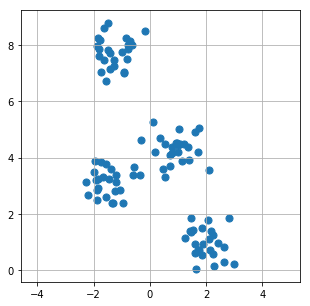

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize =(5,5))
plt.scatter(X[:,0], X[:,1], marker='o', s=50)

plt.axis('equal')
plt.grid()
plt.show()


In [8]:
#重心の初期値のインデックスを格納
centroid_index = np.random.choice(X.shape[0], 4, replace=False)

In [9]:
# 重心の座標を格納
centroids = X[centroid_index]

In [29]:
#重心の座標
centroids

array([[ 2.79939362,  1.84560825],
       [ 2.11114739,  3.57660449],
       [-1.2386086 ,  2.81373288],
       [-0.1666378 ,  8.50372399]])

In [100]:
a = np.full(100, None)
a[1] = 1

In [178]:
#クラスタを初期化。計算に使わないので、obeject型でもよい
y = np.full(X.shape[0], None)

In [179]:
y

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None], dtype=object)

In [180]:
# for i in range(len(y)):
#     #numpy配列のインデックスは０から始まるので-1
#     v = X[i-1]    
#     min_norm=10**10
#     for k,cent in enumerate (centroids):
#         norm = np.linalg.norm(cent - v)
#         #それまでの距離より小さかったら更新
            
#         if min_norm  > norm:
#             min_k = k
#             y[i] = min_k
#             #距離が最小の値を更新
#             min_norm = norm
#     #重心の計算
#     #　各データ

0
1
1
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
3
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
2
2
0
1
2
2
0
0
0
0
0
0
0
0
0
1
1
1
0
1
2
2
0
0
0
0
0
1
1
1
0
1
2
2
0
1
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
1
2
2
0
0
0
0
0
1
1
1
0
0
0
0
0
1
1
1
0
1
2
2
0
1
1
1
0
1
2
2
0
1
1
1
0
1
2
2
0
1
2
2
0
1
1
1
0
0
0
0
0
1
2
2
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
2
2
0
1
2
3
0
0
2
2
0
1
1
1
0
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
2
2
0
0
2
2
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
2
2
0
1
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
2
2
0
1
2
3
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
1
2
2
0
1
2
2
0
1
1
1
0
1
1
1
0
1
2
3
0
1
1
1


In [12]:
count = 0
#各クラスタの平均を算出
y = np.full(X.shape[0], None)
label_list = np.unique(range(4))
#重心の初期値のインデックス。（ランダムに４つ選ぶ）
centroid_index = np.random.choice(X.shape[0], 4, replace=False)
# 重心の初期の座標
centroids = X[centroid_index]
while(count < 10):
    for i in range(len(y)):
        #numpy配列のインデックスは０から始まるので-1
        v = X[i-1]    
        min_norm=10**10
        for k,cent in enumerate (centroids):
            norm = np.linalg.norm(cent - v)
            #それまでの距離より小さかったら更新
            if min_norm  > norm:
                min_k = k
                y[i] = min_k
                #距離が最小の値を更新
                min_norm = norm  
        #重心の計算
        #　各データ
    for label in label_list:
        #ラベルのインデックスを取得
        index = np.where(y==label)
        #取得したインデックスをXに対応する形でスライス
        #それx,y軸それぞれを合計を計算
        x_sum = X[index,0].sum()
        y_sum = X[index,1].sum()
        #各ラベルの要素数を取得
        num = X[index,0].shape[1]   
        #x,y座標それぞれの重心を算出
        x_c = x_sum / num 
        y_c = y_sum/ num
        #重心の座標を更新
        centroids[label] =np.array([x_c, y_c])

    count += 1
    print('重心の座標')
    print(count)
    print(centroids)
    print('-'*100)

重心の座標
1
[[-0.04990922  4.43830962]
 [-0.08035416  3.699595  ]
 [ 0.61784149  3.65989899]
 [-0.30998819  4.0773583 ]]
----------------------------------------------------------------------------------------------------
重心の座標
2
[[-0.14500229  3.96285427]
 [-0.43043268  3.99429248]
 [ 0.31409619  4.14380369]
 [ 0.0072704   3.93658858]]
----------------------------------------------------------------------------------------------------
重心の座標
3
[[-1.86407034  2.93379754]
 [-0.08227414  4.10524616]
 [ 0.07209747  4.05418032]
 [ 0.36076027  3.94110331]]
----------------------------------------------------------------------------------------------------
重心の座標
4
[[-0.10672795  4.02146779]
 [-0.26118777  4.20065906]
 [ 1.81879886  0.8210197 ]
 [ 0.23479424  4.09019356]]
----------------------------------------------------------------------------------------------------
重心の座標
5
[[-0.30038351  3.60671529]
 [-0.16779096  4.26385841]
 [ 0.61784149  3.65989899]
 [-0.04382194  4.27362905]]
-----------

In [75]:
def fit(data,k,num=15):
    y = np.full(440, None)
    count = 0
    label_list = np.unique(range(k))
    #重心の初期値のインデックス。（ランダムに４つ選ぶ）
    centroid_index = np.random.choice(data.shape[0], k, replace=False)
    # 重心の初期の座標
    centroids = data[centroid_index]
    while(count < num ):
        for i in range(len(y)):
            #numpy配列のインデックスは０から始まるので-1
            v = data[i]    
            min_norm=10**10
            for k,cent in enumerate (centroids):
                norm = np.linalg.norm(cent - v)
                #それまでの距離より小さかったら更新
                if min_norm  > norm:
                    min_k = k
                    y[i] = min_k
                    print(norm)
                    print(min_k)
                    #距離が最小の値を更新
                    min_norm = norm  
            #重心の計算
            #　各データ
        for label in label_list:
            #ラベルのインデックスを取得
            index = np.where(y==label)
            #取得したインデックスをXに対応する形でスライス
            #それx,y軸それぞれを合計を計算
            x_sum = data[index,0].sum()
            y_sum = data[index,1].sum()
            #各ラベルの要素数を取得
            num = X[index,0].shape[1]   
            #x,y座標それぞれの重心を算出
            x_c = x_sum / num 
            y_c = y_sum/ num
            #重心の座標を更新
            centroids[label] =np.array([x_c, y_c])
        count +=1
    return y,centroids

In [4]:
pred,centroids = fit(X,k)

1.3575303709530027
0
0.8070206611420259
2
4.158522922694395
0
0.7342514083841374
0
0.5380831142031827
0
0.5252251733959739
2
0.5575354692916181
0
0.9175939513743389
0
0.42813837531936366
2
3.2211599927772046
0
2.5632485295779115
2
1.0332154705050305
3
3.3811195821764164
0
0.9578850586198682
0
0.8807810404174489
2
3.655741845978987
0
2.8090439291225953
0
3.4570097092641245
0
3.430421045719408
2
3.2086296031875507
0
3.3959574333174114
0
3.104106011777403
0
5.187045935429111
0
1.3026632330127579
1
3.1892809392348296
0
1.037399866256716
1
2.1463097201449943
0
1.4042705425003652
2
3.58884289923762
0
2.85813169856083
2
0.09129491400429367
3
5.0054774304877405
0
0.9710720131426154
1
1.8013071204423936
0
3.8631567296211453
0
3.4872192732192233
0
2.769646857641543
2
0.3464960855300423
3
5.055756045520242
0
0.8859782201824266
1
0.7449600973110674
0
0.0
2
3.5867179318398654
0
2.8428699126480983
2
0.39350631771472466
3
2.1186422566088785
0
1.3787156759835923
2
0.6940152262192089
0
0.29705671326242

In [5]:
centroids

array([[-1.26811733,  7.76378266],
       [ 1.99186903,  0.96561071],
       [ 0.87728   ,  4.28881038],
       [-1.52702451,  3.10579592]])

In [6]:
pred = np.reshape(pred,(100,1))

# 分類したクラスタとデータを結合

In [7]:
np.hstack((pred,X))

array([[2, 0.7208675097620585, 3.7134712353871837],
       [0, -1.8946842296078745, 7.968985450316185],
       [2, 1.3567889411199918, 4.364624835694804],
       [2, 1.0537437913949532, 4.492868587249477],
       [2, 1.5914154189103553, 4.904977251840595],
       [2, 0.7826066698425189, 4.152635952160722],
       [3, -1.9575168557492566, 3.8729147378826396],
       [0, -0.7735453712832698, 7.879235636334189],
       [2, 0.12313498323398875, 5.279175025064285],
       [0, -1.432846693717372, 7.715770426853631],
       [0, -0.9281900116973543, 7.026981993486177],
       [0, -1.7483634484409327, 7.063074467252788],
       [0, -1.267897183859898, 7.251413266770996],
       [0, -0.9866174444802733, 7.74968685003047],
       [0, -0.8198404687948047, 7.50994721899152],
       [1, 2.996842869961005, 0.22378412936671366],
       [1, 1.468705818875798, 1.8694742527625832],
       [2, -0.33533162578993436, 3.3901220048283296],
       [3, -1.8640703435505934, 2.9337975404702985],
       [1, 2.6249

In [8]:
a = np.hstack((pred,X)).astype(float)

# 予測したクラスタ別に変数にインデックスを格納

In [9]:
np.where(a[:,0]  == 0)

(array([ 1,  7,  9, 10, 11, 12, 13, 14, 21, 31, 36, 38, 42, 45, 55, 56, 59,
        60, 65, 70, 73, 81, 95, 96, 98]),)

In [10]:
np.where(a[:,0]  == 1)

(array([15, 16, 19, 23, 28, 29, 30, 32, 33, 37, 46, 51, 57, 58, 61, 62, 64,
        68, 71, 78, 79, 80, 84, 86, 87]),)

In [11]:
np.where(a[:,0]  == 2) 

(array([ 0,  2,  3,  4,  5,  8, 17, 20, 24, 27, 35, 40, 48, 49, 50, 63, 69,
        72, 74, 75, 83, 88, 89, 90, 92, 99]),)

In [12]:
np.where(a[:,0]  == 3) 

(array([ 6, 18, 22, 25, 26, 34, 39, 41, 43, 44, 47, 52, 53, 54, 66, 67, 76,
        77, 82, 85, 91, 93, 94, 97]),)

In [14]:
centroids

array([[-1.26811733,  7.76378266],
       [ 1.99186903,  0.96561071],
       [ 0.87728   ,  4.28881038],
       [-1.52702451,  3.10579592]])

# クラスタ別にプロット

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


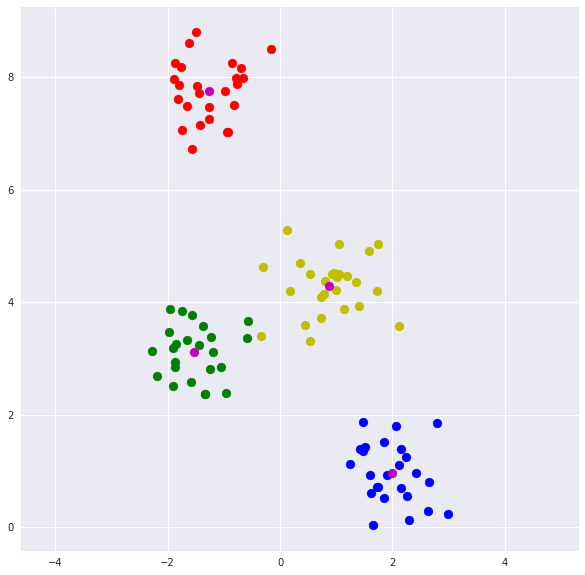

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
%matplotlib inline
plt.figure(figsize =(10,10))
#クラスタ別のインデックスを格納
index_0 = np.where(a[:,0]  == 0)
index_1 =np.where(a[:,0]  == 1)
index_2 =np.where(a[:,0]  == 2)
index_3 =np.where(a[:,0]  == 3)
#クラスタ別にプロット
plt.scatter(a[index_0,1], a[index_0,2], s=80, c='r', marker='o')
plt.scatter(a[index_1,1], a[index_1,2], s=80, c='b', marker='o')   
plt.scatter(a[index_2,1], a[index_2,2], s=80, c='y', marker='o')
plt.scatter(a[index_3,1], a[index_3,2], s=80, c='g', marker='o')
#重心をプロット
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], s=80, c='m', marker='o')
plt.axis('equal')
plt.show()

# 適切にクラスタイングできていることが確認できた

#  Whole Sale EDA

In [5]:
#ライブラリの読み込み
import pandas as pd
# データセットの読み込み
train = pd.read_csv('Wholesale customers data.csv')
    

In [19]:
#データの概要を把握
train.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
#データの主要統計量を把握
train.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


以上な値はなさそう。

In [21]:
train.groupby(['Channel','Region']).mean()

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524

チャネルによって、項目の差が生まれていることがわかる。

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


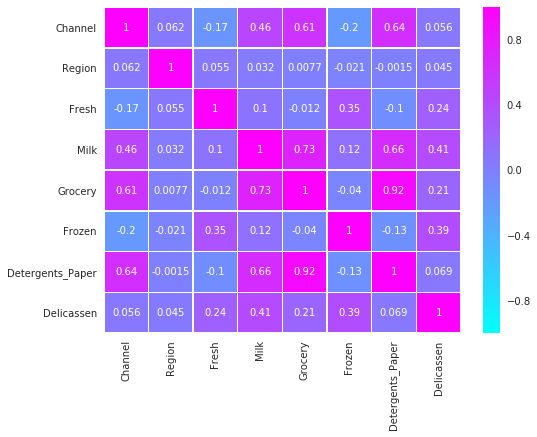

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=(8, 6)) 

sns.heatmap(train.corr(), annot=True, cmap='cool', linewidths=.5)

'Grocery'と'Detergents_Paper'で多重線形性が発生。
Channelと正に相関する項目が多い

In [6]:
#名義尺度のRigionと　Channelは使用しないのでドロップ
train = train.drop(['Region','Channel'],axis=1)

In [45]:
#名義尺度がドロップされていることを確認
train.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

# PCAは正規分布なデータを前提としているので、正規分布に従っていない特徴は正規分布に近づける

In [23]:
#必要なライブラリをインポート
from scipy import stats
from scipy.stats import norm, skew

In [24]:
 # 正規分布に従っているかskewを使って算出
train.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

Delicassen          11.113534
Frozen               5.887826
Milk                 4.039922
Detergents_Paper     3.619458
Grocery              3.575187
Fresh                2.552583
Channel              0.758355
Region              -1.279247
dtype: float64

# 正規分布に従っていないデータをBox-Cox変換して、正規分布に近づける

In [8]:
#正規分布に従っていない特徴を抽出
skewed_feats = train.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})


Skew in numerical features: 



In [9]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)

There are 6 skewed numerical features to Box Cox transform


In [210]:
train.shape

(440, 6)

# 主成分分析

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(train)
data_pca = pca.transform(train)

In [11]:
data_pca 

array([[ 4.69722922e+00,  9.09115510e-01],
       [ 5.33261824e+00,  2.07649288e+00],
       [ 5.36816219e+00,  3.87927037e+00],
       [-4.36802615e+00,  3.67213832e+00],
       [ 1.34051758e+00,  7.50305063e+00],
       [ 2.66271151e+00,  8.95129644e-01],
       [ 2.52401826e+00, -1.48266080e-01],
       [ 4.28386793e+00,  2.07703888e+00],
       [ 1.98212574e+00, -2.20469088e+00],
       [ 9.36555474e+00,  1.91290629e+00],
       [ 6.43565365e+00,  1.15963985e+00],
       [-3.74104865e+00,  1.08588379e-01],
       [ 6.13412360e+00,  5.76692342e+00],
       [ 5.50184730e+00,  5.29817848e+00],
       [ 6.47832050e+00,  4.37764591e+00],
       [-2.30194202e+00, -2.36586555e+00],
       [ 8.72865842e+00, -6.18542380e+00],
       [-9.66173654e-01,  3.39875060e-01],
       [ 3.53248094e+00,  5.75337795e+00],
       [ 2.52114943e+00, -1.27481898e+00],
       [ 1.28745605e+00,  3.40921197e+00],
       [-5.77959255e+00, -1.70160091e+00],
       [-1.47443754e+00,  8.95465727e+00],
       [ 9.

In [67]:
#2次元に圧縮されていることを確認
data_pca.shape

(440, 2)

# 次元圧縮後の説明寄与率を可視化

[0.46129987 0.74971369 0.85867212 0.93310657 0.97618163 1.        ]


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


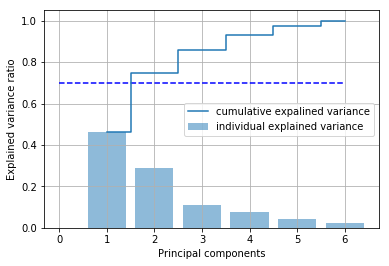

In [12]:
pca = PCA(n_components=None)
pca = pca.fit(train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

# 次元圧縮後データの可視化

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


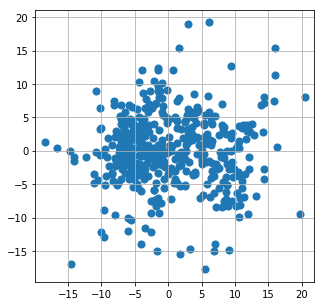

In [13]:
plt.figure(figsize =(5,5))
plt.scatter(data_pca[:,0], data_pca[:,1], marker='o', s=50)
plt.axis('equal')
plt.grid()
plt.show()

In [14]:
def fit(data,k,num=15):
    y = np.full(data.shape[0], None)

    count = 0
    label_list = np.unique(range(k))
    #重心の初期値のインデックス。（ランダムに４つ選ぶ）
    centroid_index = np.random.choice(data.shape[0], k, replace=False)
    # 重心の初期の座標
    centroids = data[centroid_index]
    while(count < num ):
        for i in range(len(y)):
            #numpy配列のインデックスは０から始まるので-1
            v = data[i]    
            min_norm=10**10
            for k,cent in enumerate (centroids):
                norm = np.linalg.norm(cent - v)
                #それまでの距離より小さかったら更新
                if min_norm  > norm:
                    min_k = k
                    y[i] = min_k
                    #距離が最小の値を更新
                    min_norm = norm  
            #重心の計算
            #　各データ
        for label in label_list:
            #ラベルのインデックスを取得
            index = np.where(y==label)
            #取得したインデックスをXに対応する形でスライス
            #それx,y軸それぞれを合計を計算
            x_sum = data[index,0].sum()
            y_sum = data[index,1].sum()
            #各ラベルの要素数を取得
            num = data[index,0].shape[1]   
            #x,y座標それぞれの重心を算出
            x_c = x_sum / num 
            y_c = y_sum/ num
            #重心の座標を更新
            centroids[label] =np.array([x_c, y_c])
        count +=1
    return y,centroids

In [51]:
#pred:クラスタリングしたラベル
#centroids:重心の座標
pred,centroids = fit(data_pca,4)

In [52]:
pred

array([2, 2, 1, 3, 1, 1, 1, 1, 0, 2, 2, 3, 1, 1, 1, 3, 2, 3, 1, 2, 1, 3,
       1, 1, 1, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 1, 1, 2, 3, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 3, 0, 1, 2, 3, 1, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2,
       0, 1, 1, 3, 3, 1, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 3, 1, 2, 2, 1,
       3, 1, 3, 3, 2, 3, 2, 0, 0, 0, 0, 3, 1, 2, 2, 1, 3, 3, 2, 2, 2, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 0, 3, 3, 0,
       3, 3, 3, 3, 1, 0, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 3,
       0, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 1, 2, 0, 3, 3, 2, 2, 2, 2, 0, 2,
       1, 3, 3, 3, 1, 1, 2, 1, 0, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 1, 1, 2,
       3, 3, 2, 2, 1, 0, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 1, 3, 0, 3, 1, 0, 3, 0, 3, 0, 3, 3, 3, 1, 1, 3,
       3, 1, 2, 2, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 0,
       2, 1, 2, 3, 2, 3, 3, 0, 0, 3, 0, 0, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3,
       3, 3, 3, 3, 0, 3, 3, 2, 1, 0, 3, 1, 2, 0, 1,

In [53]:
centroids

array([[-1.35696107, -7.78390505],
       [ 1.64756699,  5.60530029],
       [ 9.03943816, -1.41942142],
       [-5.79718635,  0.40944257]])

In [55]:
pred = np.reshape(pred,(data.shape[0],1))
a = np.hstack((pred,data_pca)).astype(float)

In [56]:
a = np.hstack((pred,data_pca)).astype(float)

In [57]:
a

array([[ 2.        ,  4.69722922,  0.90911551],
       [ 2.        ,  5.33261824,  2.07649288],
       [ 1.        ,  5.36816219,  3.87927037],
       ...,
       [ 2.        , 12.5540411 ,  4.07640732],
       [ 3.        , -5.20605516,  0.29999655],
       [ 0.        , -2.51126767, -9.38234681]])

#  結合後のデータで、所属するクラスタ別に変数に格納

In [243]:
np.where(a[:,0]  == 0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [225]:
np.where(a[:,0]  == 1)

(array([ 11,  15,  17,  21,  26,  27,  31,  32,  34,  50,  55,  58,  64,
         69,  72,  75,  76,  78,  79,  80,  84,  88,  90,  97,  98,  99,
        105, 115, 116, 117, 119, 121, 122, 130, 131, 132, 133, 134, 135,
        139, 144, 146, 147, 148, 150, 151, 153, 154, 161, 167, 168, 169,
        174, 178, 179, 184, 185, 186, 191, 192, 194, 199, 203, 204, 206,
        212, 219, 220, 222, 223, 224, 225, 227, 228, 233, 235, 236, 238,
        246, 247, 248, 250, 256, 260, 261, 263, 269, 270, 271, 272, 274,
        275, 277, 280, 285, 286, 288, 289, 290, 291, 292, 295, 299, 308,
        313, 316, 317, 318, 320, 323, 326, 327, 329, 336, 338, 339, 344,
        348, 350, 352, 355, 356, 358, 359, 361, 362, 363, 364, 366, 367,
        369, 372, 374, 375, 378, 383, 385, 386, 388, 389, 390, 391, 392,
        394, 395, 398, 399, 400, 402, 405, 410, 411, 414, 419, 428, 429,
        430, 432, 433, 438, 439]),)

In [226]:
np.where(a[:,0]  == 2) 

(array([  3,   4,  20,  22,  29,  33,  36,  39,  40,  41,  52,  54,  68,
         70,  73,  83,  87,  89,  91,  93, 103, 104, 110, 112, 113, 114,
        118, 120, 124, 125, 126, 129, 138, 140, 141, 142, 143, 149, 152,
        157, 162, 176, 177, 190, 195, 196, 198, 202, 210, 217, 229, 230,
        232, 234, 237, 239, 240, 241, 242, 249, 252, 253, 255, 257, 258,
        259, 262, 267, 273, 276, 278, 282, 283, 284, 287, 294, 296, 307,
        310, 311, 314, 321, 322, 324, 325, 328, 330, 332, 334, 337, 354,
        360, 368, 370, 371, 377, 380, 381, 382, 387, 393, 397, 401, 403,
        404, 406, 413, 422, 423, 425, 427, 431, 435, 436]),)

In [227]:
np.where(a[:,0]  == 3) 

(array([  0,   1,   2,   5,   6,   7,   9,  10,  12,  13,  14,  18,  19,
         23,  24,  28,  30,  37,  45,  46,  47,  48,  49,  56,  61,  62,
         63,  67,  71,  74,  77,  82,  85,  86,  92, 100, 102, 107, 111,
        123, 127, 136, 145, 163, 164, 165, 166, 180, 181, 183, 188, 200,
        201, 209, 211, 215, 226, 243, 244, 251, 254, 265, 268, 279, 281,
        297, 298, 300, 301, 306, 319, 331, 333, 335, 346, 347, 349, 365,
        373, 376, 384, 396, 407, 408, 409, 415, 416, 421, 424, 426, 434,
        437]),)

$ SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2$ 

In [120]:
#クラスタ番号が０の時にaの１列目を抽出
a[a[:,0]==0][:,1]

array([ -4.36802615,  -3.74104865,  -0.96617365,  -5.77959255,
        -6.07552012,  -6.97650774,  -3.59803636,  -3.22277022,
       -10.80067452,  -4.4375061 ,  -7.12599956,  -5.80424182,
        -2.12552251,  -7.01971226,  -1.33476558, -18.52757634,
        -6.34709568,  -5.4842331 ,  -7.9571053 ,  -9.69685075,
        -4.09156176,  -8.0830449 ,  -6.45784712,  -1.55466653,
        -5.82802721,  -6.51990338,  -4.64776792,  -4.48568577,
        -7.85388347,  -6.15585825,  -4.23146095,  -1.81721708,
        -5.63278094,  -5.28448679,  -6.23007279, -14.13455051,
        -5.46710167,  -6.9485859 ,  -7.19944138,  -6.3792426 ,
        -2.84749281,  -6.45855785,  -6.95516936,  -1.35702182,
        -2.88111603,  -6.73247489,  -7.12588176,  -3.17359942,
        -6.55629996,  -1.5339393 ,  -8.88058122,  -7.79906767,
        -6.25821443,  -5.89628835,  -4.68199931, -14.05279109,
        -5.05318962,  -9.24670822,  -7.98533705,  -4.89556494,
        -2.98876539,  -2.77654548,  -6.73278936,  -6.73

In [59]:
sum((a[a[:,0]==0][:,1] - centroids[0,0])**2 + (a[a[:,0]==0][:,2] - centroids[0,1])**2)

2071.1708667573607

In [60]:
sum((a[a[:,0]==1][:,1] - centroids[1,0])**2 + (a[a[:,0]==1][:,2] - centroids[1,1])**2)

2585.553722094528

In [61]:
sum((a[a[:,0]==2][:,1] - centroids[2,0])**2 + (a[a[:,0]==2][:,2] - centroids[2,1])**2)

3286.9509707248344

In [62]:
sum((a[a[:,0]==3][:,1] - centroids[3,0])**2 + (a[a[:,0]==3][:,2] - centroids[3,1])**2)

3084.748152805371

#  描画

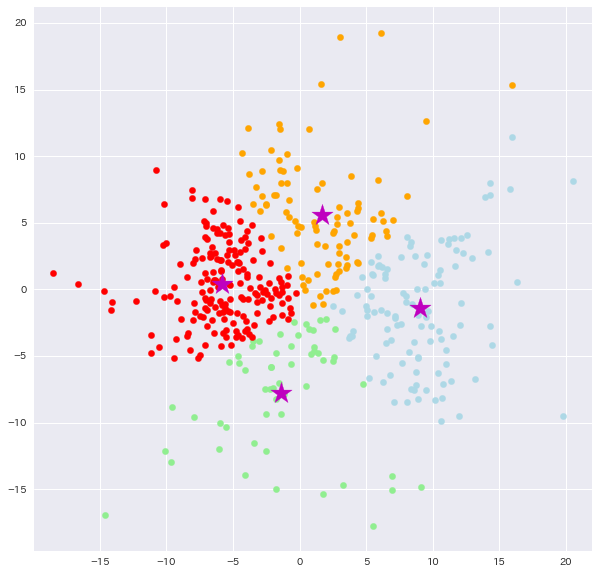

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
%matplotlib inline
plt.figure(figsize =(10,10))
#クラスタ別のインデックスを格納
index_0 = np.where(a[:,0]  == 0)
index_1 =np.where(a[:,0]  == 1)
index_2 =np.where(a[:,0]  == 2)
index_3 =np.where(a[:,0]  == 3)
#クラスタ別にプロット
plt.scatter(a[index_0,1], a[index_0,2], s=40, c='lightgreen', marker='o')
plt.scatter(a[index_1,1], a[index_1,2], s=40, c='orange', marker='o')   
plt.scatter(a[index_2,1], a[index_2,2], s=40, c='lightblue', marker='o')
plt.scatter(a[index_3,1], a[index_3,2], s=40, c='red', marker='o')
#重心をプロット
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], s=500, c='m', marker='*')

plt.axis('equal')
plt.show()

# SSE 算出

In [23]:
count = 0
k_num = 15
SSE_LIST = np.zeros(k_num)
#k回SSEを計算する
while( count < 1):
    
    for k  in range(1,k_num+1):
        pred ,centroids = fit(data_pca,k)   
        #結合できるようにリシェイプ
        pred = np.reshape(pred,(440,1))
        #結合して変数に格納
        combined = np.hstack((pred,data_pca)).astype(float)
        #SSEの初期化
        SSE = 0
    #各k番目のSSEを計算
    #各クラスターごとの中心点との２乗の誤差を足しあげる
        for cluster in range(k):
            SSE += sum((combined[combined [:,0]==cluster][:,1] - centroids[cluster,0])**2 + (combined [combined[:,0]==cluster][:,2] - centroids[cluster,1])**2)
    #k番目のSSEを格納
        print('クラスター',k,SSE)
        SSE_LIST[k-1] = SSE
#             SSE_LIST[k] = SSE
    count +=1
    print(SSE_LIST)
#k番目のSSEを保存する
       

クラスター 1 32971.8318661977
クラスター 2 18310.0151787208
クラスター 3 14132.489801899412
クラスター 4 11170.677946789287
クラスター 5 9441.792276496093
クラスター 6 7463.40078238312
クラスター 7 6956.999503162719
クラスター 8 6127.994162102791
クラスター 9 5441.592807847254
クラスター 10 4730.896299103339
クラスター 11 4218.310943961479
クラスター 12 4037.289898859965
クラスター 13 3539.1835730513376
クラスター 14 3540.466391348907
クラスター 15 3511.948473105248
[32971.8318662  18310.01517872 14132.4898019  11170.67794679
  9441.7922765   7463.40078238  6956.99950316  6127.9941621
  5441.59280785  4730.8962991   4218.31094396  4037.28989886
  3539.18357305  3540.46639135  3511.94847311]


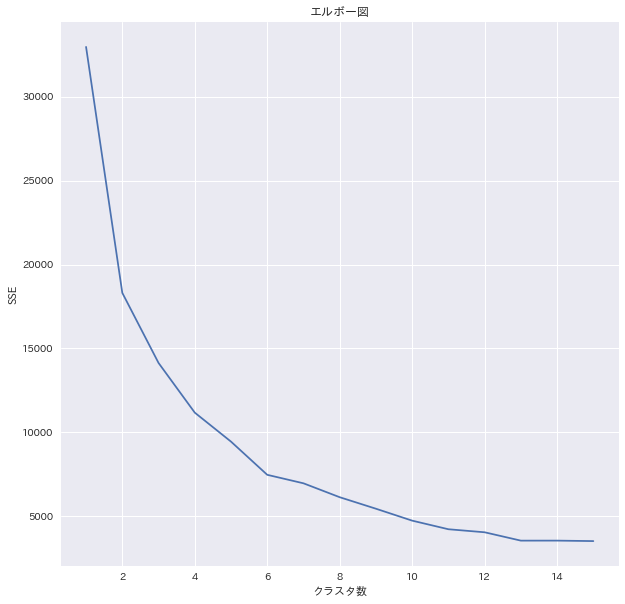

In [66]:
import seaborn as sns
import japanize_matplotlib
sns.set
plt.figure(figsize =(10,10))
left = range(1,16)
plt.title('エルボー図')
plt.ylabel('SSE')
plt.xlabel('クラスタ数')
plt.plot(left, SSE_LIST)

# クラスタ数の選択
エルボー法　からSSEが急激に下がったのはクラスタ数が4の時なので、最適だと思われるクラスタ数は４。

# 既知のグループとの比較
EDA時の名義尺度のChannelと相関する特徴が多く、クライアントの属性によって各項目の年間購入額のに差が生まれることがわかる。

# 卸売業者にとって有益な情報
項目間で多重線型性が出ているものがある、具体的に言えば、GroceryとDetergents_Paperはほとんど同じことを言っているか、
どちらかが片方を内包している可能性が高い。
以上より、クライアントの属性によって提案に注力する項目を再考すると良い。
